# Code_bascics P6

# Provide Insights to the Marketing Team in Food & Beverage Industry       


Company : CodeX

Nescssary liabrarires installed

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [3]:
dim_cities_df = pd.read_csv('C:\\Users\\sam\Documents\\C6 Input Files\\Dataset\\dim_cities.csv')

In [4]:
dim_repondents_df = pd.read_csv('C:\\Users\\sam\Documents\\C6 Input Files\\Dataset\\dim_repondents.csv')

In [5]:
fact_survey_responses_df = pd.read_csv('C:\\Users\\sam\Documents\\C6 Input Files\\Dataset\\fact_survey_responses.csv')

les't see the dataframes

In [6]:
dim_cities_df.head()

,City_ID,City,Tier
0,CT111,Delhi,Tier 1
1,CT112,Mumbai,Tier 1
2,CT113,Bangalore,Tier 1
3,CT114,Chennai,Tier 1
4,CT115,Kolkata,Tier 2


In [7]:
dim_repondents_df.head()

,Respondent_ID,Name,Age,Gender,City_ID
0,120031,Aniruddh Issac,15-18,Female,CT117
1,120032,Trisha Rout,19-30,Male,CT118
2,120033,Yuvraj Virk,15-18,Male,CT116
3,120034,Pranay Chand,31-45,Female,CT113
4,120035,Mohanlal Joshi,19-30,Female,CT120


In [8]:
fact_survey_responses_df.head()

,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
0,103001,120031,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,...,Reduced sugar content,Guarana,No,Yes,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late
1,103002,120032,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,5,...,More natural ingredients,Caffeine,Yes,Not Sure,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise
2,103003,120033,Rarely,Before exercise,Increased energy and focus,No,Neutral,Not sure,No,2,...,More natural ingredients,Caffeine,No,Yes,Online ads,Innovative bottle design,Not Sure,100-150,Supermarkets,Studying/working late
3,103004,120034,2-3 times a week,To stay awake during work/study,To boost performance,No,Positive,Dangerous,Yes,5,...,Other,Caffeine,No,Yes,Online ads,Compact and portable cans,No,Above 150,Supermarkets,Sports/exercise
4,103005,120035,Daily,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Effective,Yes,5,...,More natural ingredients,Caffeine,Yes,Yes,Online ads,Compact and portable cans,Yes,100-150,Online retailers,Studying/working late


let's see is there any null values or missing values and info of the data

In [9]:
dim_cities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   City_ID  10 non-null     object
 1   City     10 non-null     object
 2   Tier     10 non-null     object
dtypes: object(3)
memory usage: 368.0+ bytes


In [10]:
dim_repondents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Respondent_ID  10000 non-null  int64 
 1   Name           10000 non-null  object
 2   Age            10000 non-null  object
 3   Gender         10000 non-null  object
 4   City_ID        10000 non-null  object
dtypes: int64(1), object(4)
memory usage: 390.8+ KB


In [11]:
fact_survey_responses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Response_ID                     10000 non-null  int64 
 1   Respondent_ID                   10000 non-null  int64 
 2   Consume_frequency               10000 non-null  object
 3   Consume_time                    10000 non-null  object
 4   Consume_reason                  10000 non-null  object
 5   Heard_before                    10000 non-null  object
 6   Brand_perception                10000 non-null  object
 7   General_perception              10000 non-null  object
 8   Tried_before                    10000 non-null  object
 9   Taste_experience                10000 non-null  int64 
 10  Reasons_preventing_trying       10000 non-null  object
 11  Current_brands                  10000 non-null  object
 12  Reasons_for_choosing_brands     10000 non-null 

In [12]:
fact_survey_responses_df.isnull().sum().any()

False

### Data cleaning 

### if heard_before is no then Tried_before has to be no

### if Tried_before is no then Taste_experience to be Not_applicable

### if Tried_before is no then Reasons_preventing_trying has to be Not_applicable



In [13]:
fact_survey_responses_df.loc[fact_survey_responses_df['Heard_before'] == 'No', 'Tried_before'] = 'No'

fact_survey_responses_df.loc[fact_survey_responses_df['Tried_before'] == 'No', 'Taste_experience'] = 'NA'

fact_survey_responses_df.loc[fact_survey_responses_df['Tried_before'] == 'Yes', 'Reasons_preventing_trying'] = 'NA'


In [14]:
fact_survey_responses_df

,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
0,103001,120031,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,NA,...,Reduced sugar content,Guarana,No,Yes,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late
1,103002,120032,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,NA,...,More natural ingredients,Caffeine,Yes,Not Sure,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise
2,103003,120033,Rarely,Before exercise,Increased energy and focus,No,Neutral,Not sure,No,NA,...,More natural ingredients,Caffeine,No,Yes,Online ads,Innovative bottle design,Not Sure,100-150,Supermarkets,Studying/working late
3,103004,120034,2-3 times a week,To stay awake during work/study,To boost performance,No,Positive,Dangerous,No,NA,...,Other,Caffeine,No,Yes,Online ads,Compact and portable cans,No,Above 150,Supermarkets,Sports/exercise
4,103005,120035,Daily,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Effective,Yes,5,...,More natural ingredients,Caffeine,Yes,Yes,Online ads,Compact and portable cans,Yes,100-150,Online retailers,Studying/working late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,112996,130026,Daily,Before exercise,To enhance sports performance,Yes,Neutral,Not sure,No,NA,...,Other,Caffeine,No,No,Print media,Compact and portable cans,Yes,100-150,Supermarkets,Studying/working late
9996,112997,130027,Daily,To stay awake during work/study,To combat fatigue,No,Positive,Healthy,No,NA,...,More natural ingredients,Caffeine,No,No,TV commercials,Other,Yes,50-99,Online retailers,Social outings/parties
9997,112998,130028,Daily,Before exercise,Increased energy and focus,Yes,Positive,Effective,No,NA,...,Other,Caffeine,Yes,No,Outdoor billboards,Compact and portable cans,No,100-150,Other,Sports/exercise
9998,112999,130029,2-3 times a week,To stay awake during work/study,Increased energy and focus,No,Positive,Healthy,No,NA,...,Other,Sugar,Yes,Yes,Online ads,Compact and portable cans,Not Sure,50-99,Supermarkets,Studying/working late


##### since our data is clean and no null object is present ,so let's start to analyze our data and answer the business questions

### 1 : Demographic Insights

### a. Who prefers energy drink more? (male/female/non-binary?)

### since we need to join the two tables we can use pd.merge function in pandas to do this operation, like we do joins in sql for  for combining tables

In [15]:
ndf = dim_repondents_df.merge(fact_survey_responses_df,on='Respondent_ID')
ndf = ndf[['Gender','Consume_frequency']]
Gender_group_data = ndf.groupby('Gender')[['Consume_frequency']].count()
Gender_group_data

,Consume_frequency
Gender,
Female,3455
Male,6038
Non-binary,507


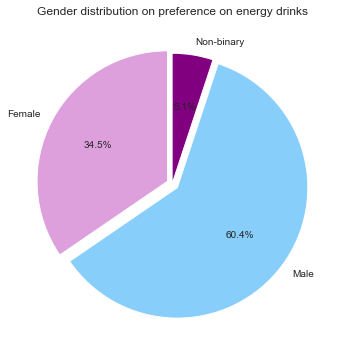

In [130]:
plt.figure(figsize=(7,6))
plt.pie(Gender_group_data.Consume_frequency, labels=Gender_group_data.index, autopct ='%.1f%%', startangle = 90, 
        explode=[0.040,0.050,0.0] ,colors=['plum','lightskyblue','purple']);
plt.title('Gender distribution on preference on energy drinks');

### b:  Which age group prefers energy drinks more?

In [131]:
ndf = dim_repondents_df.merge(fact_survey_responses_df,on='Respondent_ID')
ndf = ndf[['Age','Consume_frequency']]
age_group_data = ndf.groupby('Age')[['Consume_frequency']].count()
age_group_data

,Consume_frequency
Age,
15-18,1488
19-30,5520
31-45,2376
46-65,426
65+,190


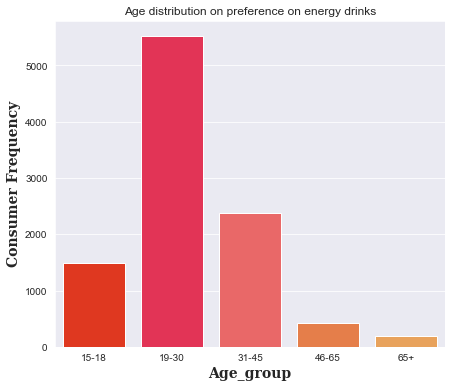

In [132]:
sns.set_style('darkgrid')
font_properties = {'family': 'serif', 'size': 14, 'weight': 'bold'}

plt.figure(figsize=(7,6))
sns.barplot(x=age_group_data.index , y=age_group_data.Consume_frequency,palette=['#FF2000', '#FF1744', '#FF5252', '#ff7530', '#ffa245']);

plt.xlabel("Age_group",fontdict=font_properties)
plt.ylabel('Consumer Frequency',fontdict=font_properties)
plt.title('Age distribution on preference on energy drinks')
plt.show()

### C:  Which type of marketing reaches the most Youth (15-30)

In [133]:
ndf = dim_repondents_df.merge(fact_survey_responses_df,on='Respondent_ID')
filtered_df = ndf[ndf['Age'] == '15-18']
Marketing_group_df = filtered_df.groupby('Marketing_channels')[['Age']].count().sort_values('Age',ascending=False)
Marketing_group_df

,Age
Marketing_channels,
Online ads,707
TV commercials,495
Outdoor billboards,117
Other,94
Print media,75


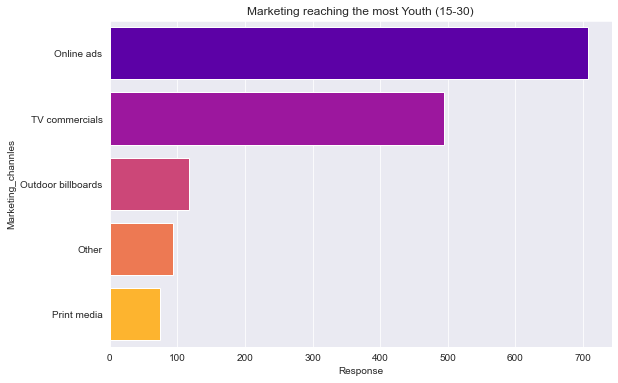

In [134]:
plt.figure(figsize=(9,6))
sns.barplot(x=Marketing_group_df.Age, y=Marketing_group_df.index,saturation=1.5,palette='plasma')
plt.ylabel("Marketing_channles")
plt.xlabel('Response')
plt.title('Marketing reaching the most Youth (15-30)')
plt.show()

### 2 Marketing Channels and Brand Awareness:

### a. What are the preferred ingredients of energy drinks among respondents?


In [135]:

ingredients_df = fact_survey_responses_df.groupby('Ingredients_expected')[['Consume_frequency']].count().sort_values('Consume_frequency',ascending=False)
ingredients_df

,Consume_frequency
Ingredients_expected,
Caffeine,3896
Vitamins,2534
Sugar,2017
Guarana,1553


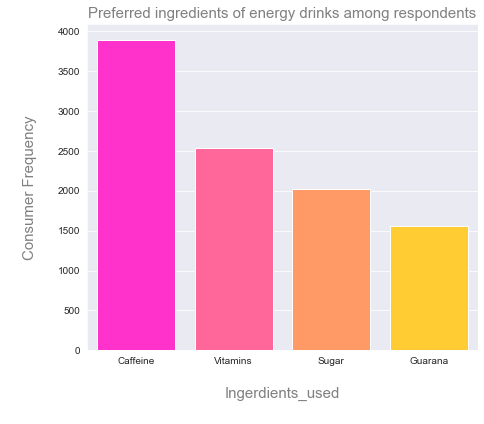

In [136]:
plt.figure(figsize=(7,6))

sns.barplot(y=ingredients_df.Consume_frequency ,x=ingredients_df.index,saturation=2.5,palette='spring');
plt.xlabel('\nIngerdients_used\n',fontsize=15, color='grey')
plt.ylabel('\nConsumer Frequency\n',fontsize=15, color='grey')
plt.title('Preferred ingredients of energy drinks among respondents',fontsize=15, color='grey');

In [137]:
ingredients_df = ndf.groupby('Ingredients_expected')[['Gender']].value_counts().unstack()
ingredients_df



Gender,Female,Male,Non-binary
Ingredients_expected,,,
Caffeine,1342,2363,191
Guarana,543,919,91
Sugar,676,1254,87
Vitamins,894,1502,138


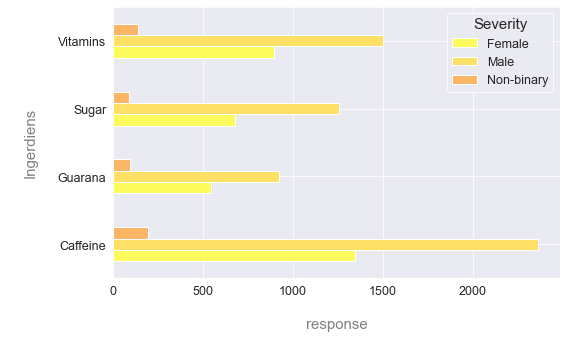

In [138]:
# 5

ingredients_df = ndf.groupby('Ingredients_expected')[['Gender']].value_counts().unstack()
ax = ingredients_df.plot(kind='barh', figsize=(8, 5), 
                               color=['#fcfa5d', '#ffe066', '#fab666', '#f68f6a'],
                               rot=0);

    
ax.spines['bottom'].set_bounds(0,0)
ax.set_ylabel('\nIngerdiens\n', fontsize=15, color='grey');
ax.set_xlabel('\nresponse\n', fontsize=15, color='grey');
ax.legend(prop={'size': 12.5}, loc='best', fancybox = True, title="Severity", title_fontsize=15, edgecolor='white');
ax.tick_params(axis='both', which='major', labelsize=12.5)



### b. What packaging preferences do respondents have for energy drinks?


In [139]:
Packing_df = fact_survey_responses_df.groupby('Packaging_preference')[['Consume_frequency']].count().sort_values('Consume_frequency',ascending=False)
Packing_df

,Consume_frequency
Packaging_preference,
Compact and portable cans,3984
Innovative bottle design,3047
Collectible packaging,1501
Eco-friendly design,983
Other,485


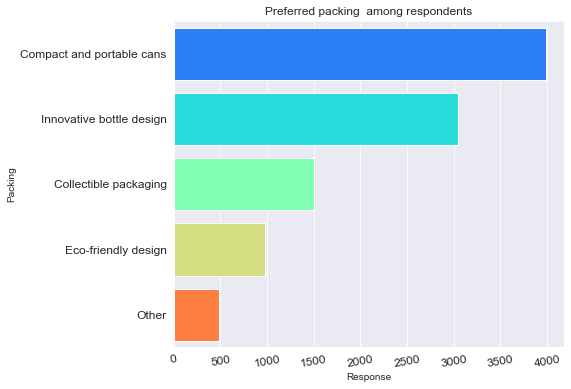

In [140]:
plt.figure(figsize=(7,6))

sns.barplot(x=Packing_df.Consume_frequency ,y=Packing_df.index,saturation=2.5 ,palette='rainbow');
plt.xlabel('Response')
plt.ylabel('Packing')
plt.xticks(rotation=10, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Preferred packing  among respondents');

###  3 Competition Analysis:


### a. Who are the current market leaders?


In [141]:
current_markrt_leaders_df = fact_survey_responses_df.groupby('Current_brands')[['Consume_frequency']].count().sort_values('Consume_frequency',ascending=False)

current_markrt_leaders_df

,Consume_frequency
Current_brands,
Cola-Coka,2538
Bepsi,2112
Gangster,1854
Blue Bull,1058
CodeX,980
Sky 9,979
Others,479


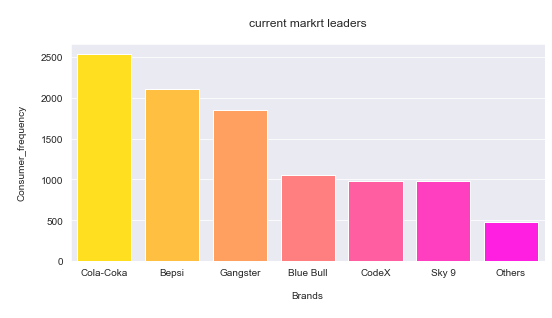

In [142]:
plt.figure(figsize=(8.5,4))
sns.barplot(x=current_markrt_leaders_df.index,y=current_markrt_leaders_df.Consume_frequency,palette="spring_r",saturation=2.5);
plt.xlabel('\nBrands\n')
plt.ylabel('\nConsumer_frequency\n')
plt.title('\ncurrent markrt leaders\n');

### b. What are the primary reasons consumers prefer those brands over ours?

In [143]:
brands_over_df = fact_survey_responses_df.groupby('Reasons_for_choosing_brands')[['Consume_frequency']].count().sort_values('Consume_frequency',ascending=False)

brands_over_df

,Consume_frequency
Reasons_for_choosing_brands,
Brand reputation,2652
Taste/flavor preference,2011
Availability,1910
Effectiveness,1748
Other,1679


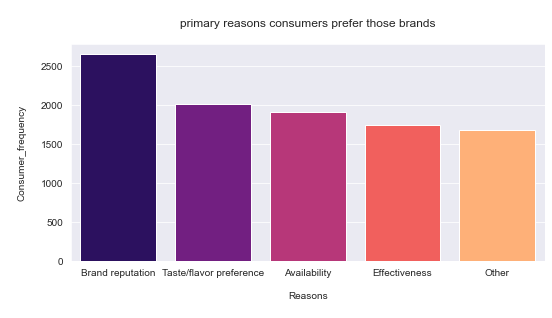

In [144]:
plt.figure(figsize=(8.5,4))
sns.barplot(x=brands_over_df.index,y=brands_over_df.Consume_frequency,palette="magma",saturation=2.5);
plt.xlabel('\nReasons\n')
plt.ylabel('\nConsumer_frequency\n')
plt.title('\nprimary reasons consumers prefer those brands\n');

### 4 Marketing Channels and Brand Awareness:

### a. Which marketing channel can be used to reach more customers?

In [145]:
marketing_channel = fact_survey_responses_df.groupby('Marketing_channels')[['Consume_frequency']].count()
marketing_channel

,Consume_frequency
Marketing_channels,
Online ads,4020
Other,1225
Outdoor billboards,1226
Print media,841
TV commercials,2688


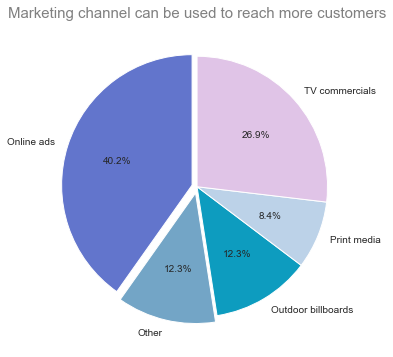

In [146]:
plt.figure(figsize=(7,6))
 
plt.pie(marketing_channel.Consume_frequency, labels=marketing_channel.index, autopct ='%.1f%%', startangle = 90, 
        explode=[0.040,0.050,0.0,0.0,0.0] ,colors=['#6275CC','#73A5C6','#0D9CBF','#BCD2E8','#E0C4E7']);
plt.title('Marketing channel can be used to reach more customers',fontsize=15,color='grey');


### b. How effective are different marketing strategies and channels in reaching our customers?

In [147]:
ndf = dim_repondents_df.merge(fact_survey_responses_df,on='Respondent_ID')
ndff = ndf[['Gender','Consume_frequency']]
Gender_group_data = ndf.groupby('Gender')[['Consume_frequency']].count()
Gender_group_data

,Consume_frequency
Gender,
Female,3455
Male,6038
Non-binary,507


In [148]:
dim_repondents_df.head()

,Respondent_ID,Name,Age,Gender,City_ID
0,120031,Aniruddh Issac,15-18,Female,CT117
1,120032,Trisha Rout,19-30,Male,CT118
2,120033,Yuvraj Virk,15-18,Male,CT116
3,120034,Pranay Chand,31-45,Female,CT113
4,120035,Mohanlal Joshi,19-30,Female,CT120


In [149]:
# so we can create suplots for this for better understaning

In [150]:
nndf = ndf.merge(dim_cities_df,on='City_ID')
nndf.head()

,Respondent_ID,Name,Age,Gender,City_ID,Response_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,...,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations,City,Tier
0,120031,Aniruddh Issac,15-18,Female,CT117,103001,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,...,No,Yes,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late,Ahmedabad,Tier 2
1,120055,Umang Sarkar,31-45,Non-binary,CT117,103025,Once a week,Before exercise,To enhance sports performance,Yes,...,No,No,Outdoor billboards,Eco-friendly design,No,Above 150,Gyms and fitness centers,Studying/working late,Ahmedabad,Tier 2
2,120057,Kanav Thaman,19-30,Male,CT117,103027,Daily,Before exercise,To boost performance,No,...,No,Not Sure,TV commercials,Innovative bottle design,No,50-99,Online retailers,Sports/exercise,Ahmedabad,Tier 2
3,120078,Suhana Ramakrishnan,19-30,Female,CT117,103048,Rarely,Before exercise,To enhance sports performance,No,...,Yes,Yes,TV commercials,Other,Not Sure,100-150,Supermarkets,Sports/exercise,Ahmedabad,Tier 2
4,120098,Saira Sridhar,19-30,Male,CT117,103068,Daily,Throughout the day,Other,No,...,Yes,No,TV commercials,Compact and portable cans,Yes,100-150,Other,Studying/working late,Ahmedabad,Tier 2


In [151]:
a = nndf.groupby('Tier')[['Marketing_channels']].count()
a

,Marketing_channels
Tier,
Tier 1,7537
Tier 2,2463


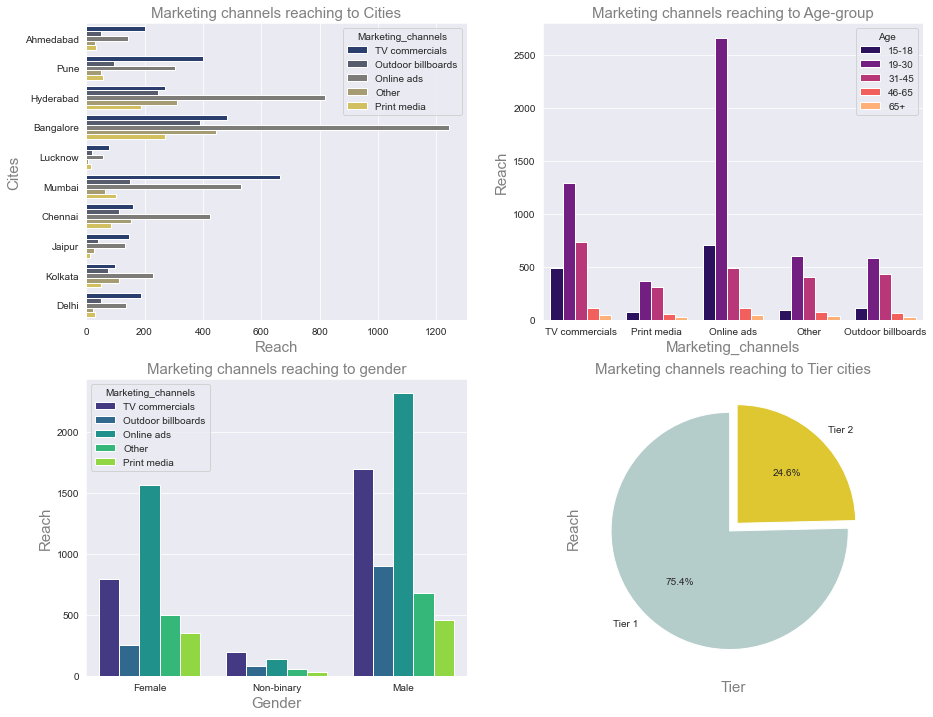

In [152]:
#fig , axes = plt.subplots(2,2)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

axes[0,0].set_title('Marketing channels reaching to Cities', fontsize=15, color='grey')
sns.countplot(y='City',
              hue='Marketing_channels',
              data=nndf,ax=axes[0,0],
              palette='cividis',saturation=3.5);

axes[0,0].set_xlabel('Reach', fontsize=15, color='grey')
axes[0,0].set_ylabel('Cites', fontsize=15, color='grey')


axes[0,1].set_title('Marketing channels reaching to Age-group', fontsize=15, color='grey')
sns.countplot(x ='Marketing_channels',
              data=ndf,ax=axes[0,1],
              hue='Age',palette='magma',
              saturation=3.5)

axes[0,1].set_xlabel('Marketing_channels', fontsize=15, color='grey')
axes[0,1].set_ylabel('Reach', fontsize=15, color='grey')
#sns.histplot(x='Marketing_channels',data=ndf,bins=np.arange(0,5,0.5),ax=axes[0,1])

axes[1,0].set_title('Marketing channels reaching to gender', fontsize=15, color='grey')
sns.countplot(x='Gender',hue='Marketing_channels',
              data=nndf,ax=axes[1,0],
              palette='viridis',saturation=3.5);

axes[1,0].set_xlabel('Gender', fontsize=15, color='grey')
axes[1,0].set_ylabel('Reach', fontsize=15, color='grey')


axes[1,1].set_title('Marketing channels reaching to Tier cities', fontsize=15, color='grey')
axes[1,1].pie(a.Marketing_channels, 
              labels=a.index, 
              autopct ='%.1f%%', startangle = 90, 
        explode=[0.040,0.050] ,colors=['#b5cdca','#dfc731']);

axes[1,1].set_xlabel('Tier', fontsize=15, color='grey');
axes[1,1].set_ylabel('Reach', fontsize=15, color='grey');




In [153]:
nndf.columns

Index(['Respondent_ID', 'Name', 'Age', 'Gender', 'City_ID', 'Response_ID',
       'Consume_frequency', 'Consume_time', 'Consume_reason', 'Heard_before',
       'Brand_perception', 'General_perception', 'Tried_before',
       'Taste_experience', 'Reasons_preventing_trying', 'Current_brands',
       'Reasons_for_choosing_brands', 'Improvements_desired',
       'Ingredients_expected', 'Health_concerns',
       'Interest_in_natural_or_organic', 'Marketing_channels',
       'Packaging_preference', 'Limited_edition_packaging', 'Price_range',
       'Purchase_location', 'Typical_consumption_situations', 'City', 'Tier'],
      dtype='object')

### 5.  Brand Penetration:


### a. What do people think about our brand? (overall rating)


In [154]:
brand_pt = nndf.groupby('Brand_perception')[['Brand_perception']].count()
brand_pt

,Brand_perception
Brand_perception,
Negative,1769
Neutral,5974
Positive,2257


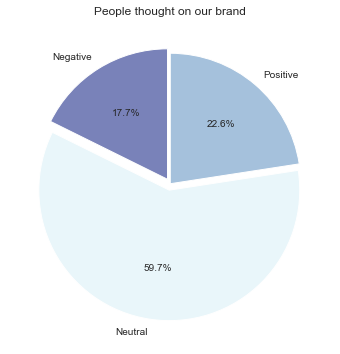

In [155]:
plt.figure(figsize=(7,6))
plt.pie(brand_pt.Brand_perception, labels=brand_pt.index, autopct ='%.1f%%', startangle = 90, 
        explode=[0.040,0.050,0.0] ,colors=['#7982B9','#E9F6FA','#A5C1DC']);
plt.title('People thought on our brand');

### b. Which cities do we need to focus more on?

In [156]:
brand_city_pt = nndf.groupby('City')[['Brand_perception']].count()
brand_city_pt = brand_city_pt.sort_values('Brand_perception',ascending=False)

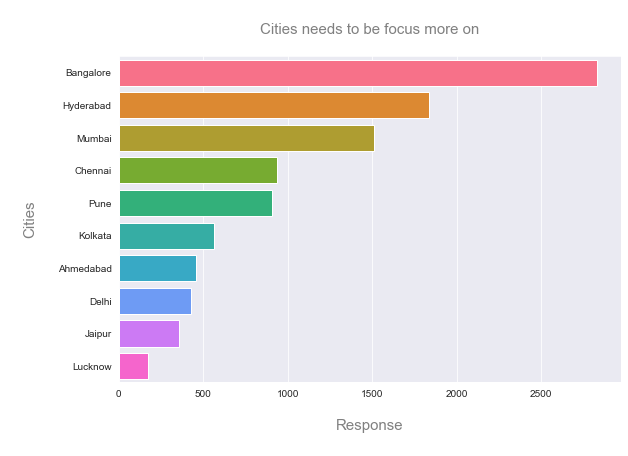

In [157]:
plt.figure(figsize=(9,6))
sns.barplot(x=brand_city_pt.Brand_perception, y=brand_city_pt.index,saturation=1.5,palette='husl')
plt.ylabel("\nCities\n",fontsize=15, color='grey')
plt.xlabel('\nResponse\n',fontsize=15, color='grey')
plt.title('\nCities needs to be focus more on\n',fontsize=15, color='grey')
plt.show()

## 6. Purchase Behavior:


### a. Where do respondents prefer to purchase energy drinks?


In [158]:
purchase_df = nndf.groupby('Purchase_location')[['Consume_frequency']].count()
purchase_df = purchase_df.sort_values('Consume_frequency',ascending=False)
purchase_df

,Consume_frequency
Purchase_location,
Supermarkets,4494
Online retailers,2550
Gyms and fitness centers,1464
Local stores,813
Other,679


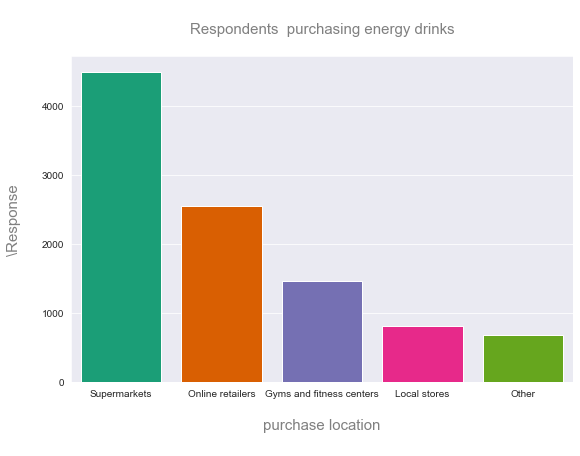

In [159]:
plt.figure(figsize=(9,6))
sns.barplot(y=purchase_df.Consume_frequency, x=purchase_df.index,saturation=1.5,palette='Dark2')
plt.ylabel("\Response\n",fontsize=15, color='grey')
plt.xlabel('\npurchase location\n',fontsize=15, color='grey')
plt.title('\nRespondents  purchasing energy drinks\n',fontsize=15, color='grey')
plt.show()

### b. What are the typical consumption situations for energy drinks among respondents?

In [160]:
consume_df = nndf.groupby('Typical_consumption_situations')[['Consume_frequency']].count()
consume_df = consume_df.sort_values('Consume_frequency',ascending=False)
consume_df

,Consume_frequency
Typical_consumption_situations,
Sports/exercise,4494
Studying/working late,3231
Social outings/parties,1487
Other,491
Driving/commuting,297


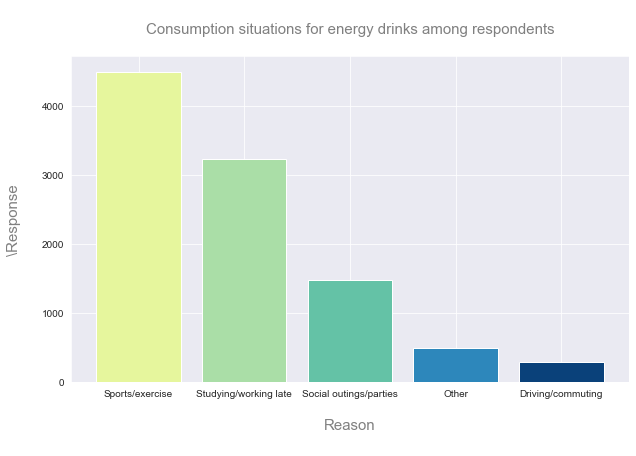

In [161]:
plt.figure(figsize=(10,6))
plt.bar(x=consume_df.index,height=consume_df.Consume_frequency,align='center',color=['#E6F69D','#AADEA7','#64C2A6','#2D87BB','#0a417a'])
plt.xlabel("\nReason\n",fontsize=15, color='grey')
plt.ylabel('\Response\n',fontsize=15, color='grey')
plt.title('\nConsumption situations for energy drinks among respondents\n',fontsize=15, color='grey')
plt.show()

### c. What factors influence respondents' purchase decisions, such as price range and limited edition packaging?

For representing this we can use the suplots for better understanding

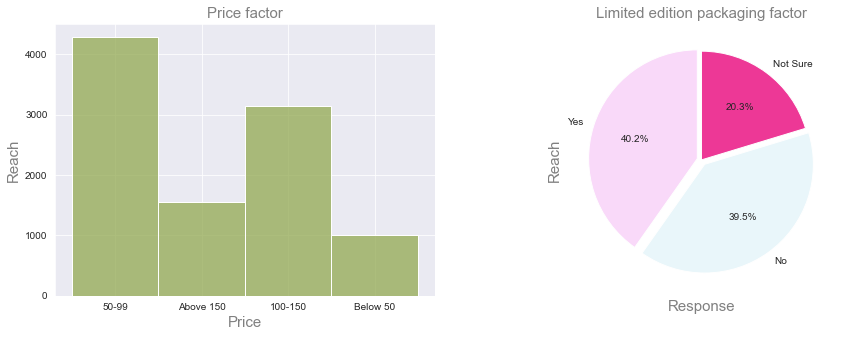

In [162]:
fig, axes = plt.subplots(1,2, figsize=(15, 5))

axes[0].set_title('Price factor', fontsize=15, color='grey')
sns.histplot(x=nndf['Price_range'],ax=axes[0],color='#92A951');

axes[0].set_xlabel('Price', fontsize=15, color='grey')
axes[0].set_ylabel('Reach', fontsize=15, color='grey')


axes[1].set_title('Limited edition packaging factor', fontsize=15, color='grey')
axes[1].pie(nndf['Limited_edition_packaging'].value_counts(),
            labels=nndf.Limited_edition_packaging.unique(),
            autopct ='%.1f%%', startangle = 90, 
        explode=[0.040,0.050,0.0] ,colors=['#f9d9f9','#E9F6FA','#ed3896']);

axes[1].set_xlabel('Response', fontsize=15, color='grey');
axes[1].set_ylabel('Reach', fontsize=15, color='grey');



### 7. Product Development
a. Which area of business should we focus more on our product development? 
(Branding/taste/availability

In [163]:
Taste_df = nndf.groupby('Current_brands')[['Taste_experience']].count().sort_values('Taste_experience',ascending=False)
Taste_df

# taken count of the response of the taste  by the consumer

,Taste_experience
Current_brands,
Cola-Coka,2538
Bepsi,2112
Gangster,1854
Blue Bull,1058
CodeX,980
Sky 9,979
Others,479


In [164]:
filtered_df = nndf[nndf['Reasons_for_choosing_brands'] == 'Availability']
Available_df = filtered_df.groupby('Current_brands')[['Consume_frequency']].count().sort_values('Consume_frequency',ascending=False)
Available_df

,Consume_frequency
Current_brands,
Cola-Coka,510
Bepsi,418
Gangster,339
CodeX,195
Sky 9,182
Blue Bull,180
Others,86


In [165]:
filtered_df = nndf[nndf['Reasons_for_choosing_brands'] == 'Brand reputation']
Brand_df = filtered_df.groupby('Current_brands')[['Consume_frequency']].count().sort_values('Consume_frequency',ascending=False)
Brand_df

,Consume_frequency
Current_brands,
Cola-Coka,616
Bepsi,577
Gangster,511
Blue Bull,289
Sky 9,260
CodeX,259
Others,140


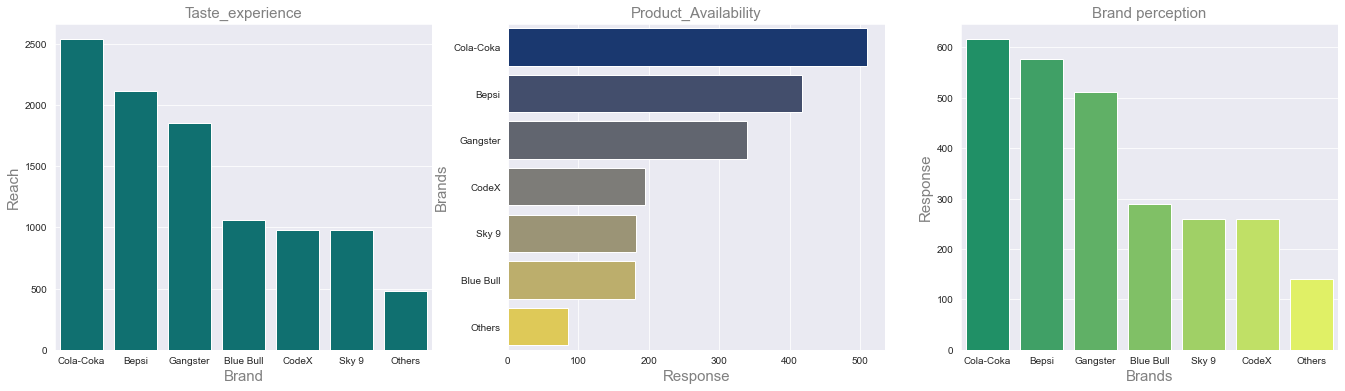

In [166]:
fig, axes = plt.subplots(1,3 ,figsize=(23, 6))

axes[0].set_title('Taste_experience', fontsize=15, color='grey')
sns.barplot(y=Taste_df.Taste_experience,
            x=Taste_df.index,ax=axes[0],
            color='#008080');

axes[0].set_xlabel('Brand', fontsize=15, color='grey')
axes[0].set_ylabel('Reach', fontsize=15, color='grey')


axes[1].set_title('Product_Availability', fontsize=15, color='grey')
sns.barplot(y=Available_df.index,x=Available_df.Consume_frequency,
            ax=axes[1],saturation=3.5,
            palette='cividis');

axes[1].set_xlabel('Response', fontsize=15, color='grey');
axes[1].set_ylabel('Brands', fontsize=15, color='grey');


axes[2].set_title('Brand perception', fontsize=15, color='grey')
sns.barplot(x=Brand_df.index,y=Brand_df.Consume_frequency,
            ax=axes[2],saturation=3.5,
            palette='summer');

axes[2].set_ylabel('Response', fontsize=15, color='grey');
axes[2].set_xlabel('Brands', fontsize=15, color='grey');



#### now let's focous on Codex Company

In [167]:
codex_df =  nndf[nndf['Current_brands'] == 'CodeX']
codex_df.head()

,Respondent_ID,Name,Age,Gender,City_ID,Response_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,...,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations,City,Tier
10,120184,Amani Krishnamurthy,19-30,Male,CT117,103154,2-3 times a month,Before exercise,Increased energy and focus,No,...,Yes,Yes,Outdoor billboards,Innovative bottle design,Yes,Below 50,Supermarkets,Sports/exercise,Ahmedabad,Tier 2
11,120185,Aarav Rana,19-30,Male,CT117,103155,2-3 times a week,For mental alertness,To boost performance,Yes,...,Yes,Yes,TV commercials,Compact and portable cans,No,50-99,Online retailers,Sports/exercise,Ahmedabad,Tier 2
25,120471,Yuvraj Acharya,31-45,Female,CT117,103441,Rarely,For mental alertness,Increased energy and focus,Yes,...,No,Not Sure,Online ads,Innovative bottle design,Not Sure,Below 50,Online retailers,Sports/exercise,Ahmedabad,Tier 2
27,120520,Miraya D’Alia,19-30,Female,CT117,103490,Rarely,Before exercise,Increased energy and focus,Yes,...,No,Not Sure,Print media,Eco-friendly design,Not Sure,50-99,Online retailers,Sports/exercise,Ahmedabad,Tier 2
32,120634,Faiyaz Tank,19-30,Female,CT117,103604,Rarely,For mental alertness,To combat fatigue,Yes,...,Yes,Yes,Online ads,Innovative bottle design,No,Above 150,Other,Studying/working late,Ahmedabad,Tier 2


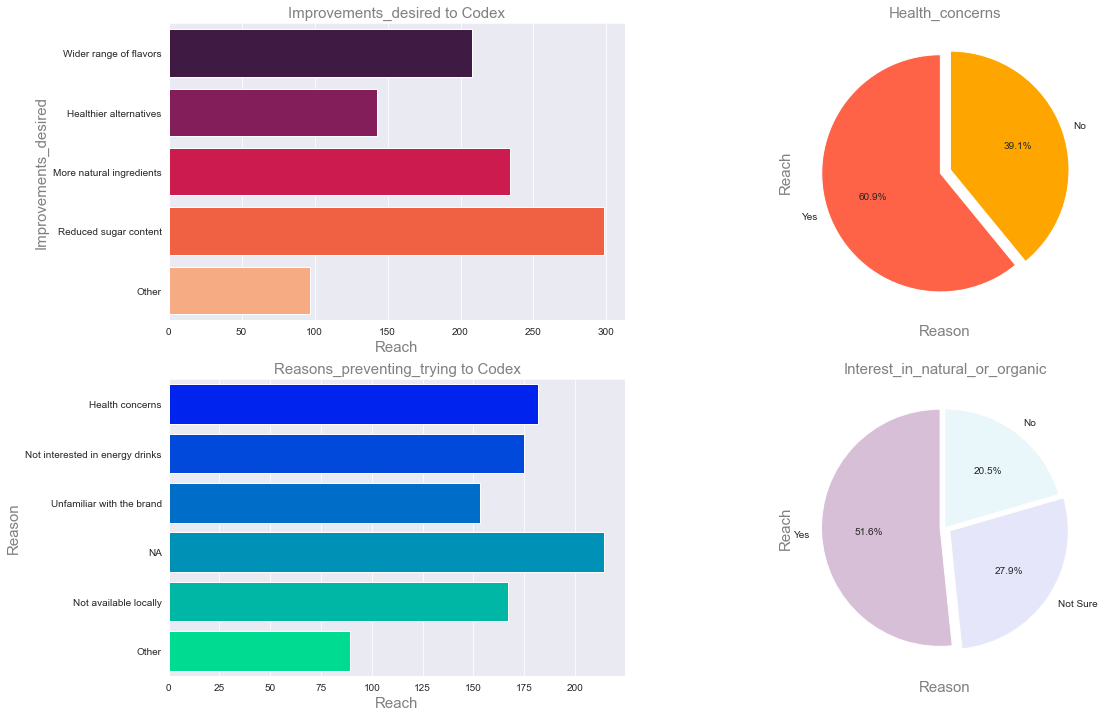

In [168]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

axes[0,0].set_title('Improvements_desired to Codex', fontsize=15, color='grey')
sns.countplot(y='Improvements_desired',
              data=codex_df,ax=axes[0,0],
              palette='rocket',saturation=3.5);

axes[0,0].set_xlabel('Reach', fontsize=15, color='grey')
axes[0,0].set_ylabel('Improvements_desired', fontsize=15, color='grey')


axes[1,0].set_title('Reasons_preventing_trying to Codex', fontsize=15, color='grey')
sns.countplot(y ='Reasons_preventing_trying',
              data=codex_df,ax=axes[1,0],
              palette='winter',saturation=3.5)

axes[1,0].set_ylabel('Reason', fontsize=15, color='grey')
axes[1,0].set_xlabel('Reach', fontsize=15, color='grey')


axes[0,1].set_title('Health_concerns', fontsize=15, color='grey')
axes[0,1].pie(codex_df['Health_concerns'].value_counts(),
              labels=codex_df.Health_concerns.unique(), 
              autopct ='%.1f%%', startangle = 90, 
              explode=[0.040,0.050] ,colors=['#FF6347','#FFA500']);

axes[0,1].set_xlabel('Reason', fontsize=15, color='grey');
axes[0,1].set_ylabel('Reach', fontsize=15, color='grey');


axes[1,1].set_title('Interest_in_natural_or_organic', fontsize=15, color='grey')
axes[1,1].pie(codex_df['Interest_in_natural_or_organic'].value_counts(),
              labels=codex_df.Interest_in_natural_or_organic.unique(), 
              autopct ='%.1f%%', startangle = 90, 
              explode=[0.040,0.050,0.0] ,colors=['#D8BFD8','#E6E6FA','#E9F6FA']);

axes[1,1].set_xlabel('Reason', fontsize=15, color='grey');
axes[1,1].set_ylabel('Reach', fontsize=15, color='grey');



### Tier 1 and Tier 2 cities

In [169]:
filtered_df = nndf[nndf['Tier'] == 'Tier 1']
T1_df = filtered_df.groupby('City')[['Consume_frequency']].count().sort_values('Consume_frequency',ascending=False)
T1_df

,Consume_frequency
City,
Bangalore,2828
Hyderabad,1833
Mumbai,1510
Chennai,937
Delhi,429


In [170]:
filtered_df = nndf[nndf['Tier'] == 'Tier 2']
T2_df = filtered_df.groupby('City')[['Consume_frequency']].count().sort_values('Consume_frequency',ascending=False)
T2_df

,Consume_frequency
City,
Pune,906
Kolkata,566
Ahmedabad,456
Jaipur,360
Lucknow,175


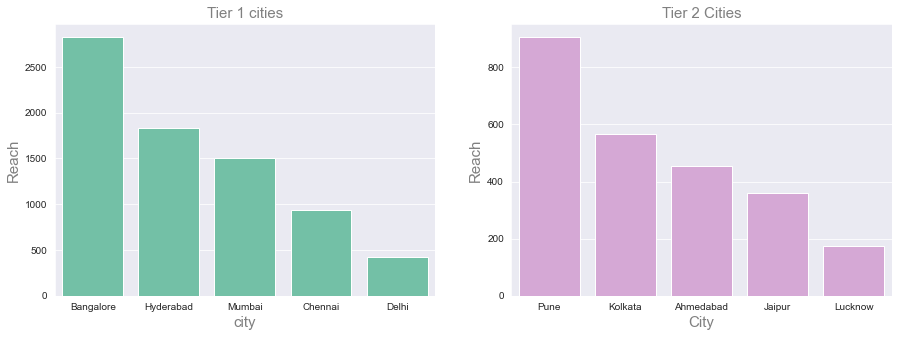

In [171]:
fig, axes = plt.subplots(1,2, figsize=(15, 5))

axes[0].set_title('Tier 1 cities', fontsize=15, color='grey')
sns.barplot(x=T1_df.index,y=T1_df.Consume_frequency,ax=axes[0],color='#66CDAA');

axes[0].set_xlabel('city', fontsize=15, color='grey')
axes[0].set_ylabel('Reach', fontsize=15, color='grey')


axes[1].set_title('Tier 2 Cities', fontsize=15, color='grey')
sns.barplot(x=T2_df.index,y=T2_df.Consume_frequency,ax=axes[1],color='plum');

axes[1].set_xlabel('City', fontsize=15, color='grey');
axes[1].set_ylabel('Reach', fontsize=15, color='grey');

# Thank you